## Analiza podatkov


### Nalaganje podatkov

In [6]:
import pandas as pd 

igre = pd.read_csv("../../PROG1/IndieAnalysis/igre.csv")
znacke = pd.read_csv("../../PROG1/IndieAnalysis/znacke.csv")

In [7]:
igre

,id,title,description,reviews_num,reviews_perc,year,price
0,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00
1,1,Dota 2,"Every day, millions of players worldwide enter...",1927523,82,2013,0.00
2,2,Apex Legends™,"Apex Legends is the award-winning, free-to-pla...",588626,83,2020,0.00
3,3,Call of Duty®: Modern Warfare® II,Call of Duty®: Modern Warfare® II drops player...,178727,61,2022,69.99
4,4,Football Manager 2023,"Build your dream squad, outsmart your rivals a...",6292,86,2022,59.99
...,...,...,...,...,...,...,...
24069,24069,Questr,Manage a party of personalities on epic (and g...,17,76,2017,2.99
24070,24070,Devil's Toy,"Devil's Toy is a first person horror game, is ...",19,63,2018,0.79
24071,24071,Ghost Blood,Ghost Blood is a first-person action game wher...,32,75,2021,3.99
24072,24072,MahJong,MahJong generates random tile arrangements tha...,15,66,2008,4.99


In [8]:
znacke

,id,tag
0,0,FPS
1,0,Shooter
2,0,Multiplayer
3,0,Competitive
4,0,Action
...,...,...
255331,24073,Linear
255332,24073,Narration
255333,24073,Text-Based
255334,24073,Funny


#### Popularnost različnih žanrov
Radi bi ugotovili kako se s časom spreminja popularnost različnih žanrov. Le-teh je precej veliko,
zato si oglejmo le najbolj popularne:

Prvi korak je, da združimo tabeli z znackami ter igrami glede na ID stevilko

In [9]:
skupna_tabela = pd.merge(igre, znacke, left_on='id', right_on='id')
skupna_tabela

,id,title,description,reviews_num,reviews_perc,year,price,tag
0,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,FPS
1,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Shooter
2,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Multiplayer
3,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Competitive
4,0,Counter-Strike: Global Offensive,Counter-Strike: Global Offensive (CS: GO) expa...,6926225,88,2012,0.00,Action
...,...,...,...,...,...,...,...,...
255331,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Linear
255332,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Narration
255333,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Text-Based
255334,24073,Naked News,Join in the fun with an unforgettable experien...,95,66,2020,0.79,Funny


Spodaj vidimo 20 najbolj popularnih značk in pri vsaki število z njimi označenih iger:

In [34]:
tag_popularity = skupna_tabela.groupby('tag').size().sort_values(ascending=False).head(20)
tag_popularity

# Seznam 20 najbolj popularnih značk
top_tags = tag_popularity.keys().to_list() 


tag
Indie           14876
Singleplayer    14267
Adventure       11056
Action          10514
Casual           9947
2D               7374
Strategy         5662
Simulation       5658
Atmospheric      5608
RPG              5229
Puzzle           4971
Multiplayer      4246
Cute             3716
Exploration      3426
Anime            3409
Funny            3388
Colorful         3387
Fantasy          3281
3D               3239
First-Person     3211
dtype: int64

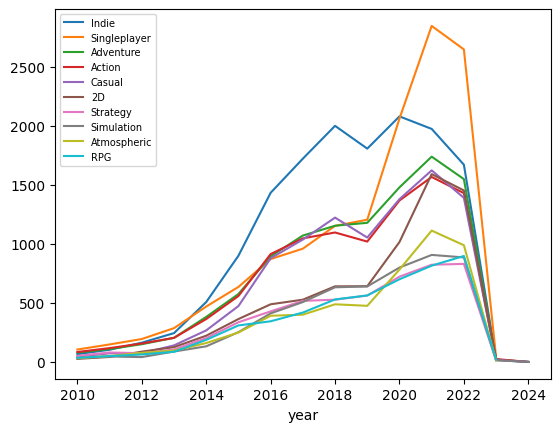

In [58]:
import matplotlib as mpl    
def plot_tag_over_time(tag: str):
    '''Sprejme značko (naj bo ena izmed 20 zgoraj) in nariše graf 
    popularnosti značke v odvisnosti od časa'''
    temp = skupna_tabela[skupna_tabela.tag == tag]
    temp[temp['year'] >= 2010].groupby('year').size().plot()

for tag in top_tags[:10]:
    # V grafu je lahko največ 10 barv, zato bomo narisali dva grafa
    plot_tag_over_time(tag)
mpl.pyplot.legend(top_tags[:10], prop={'size' : 7}, loc='upper left')

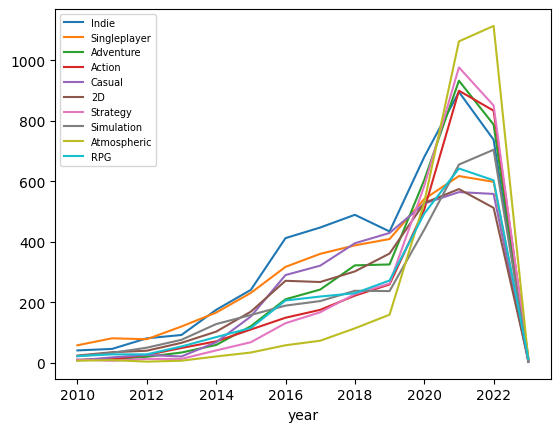

In [56]:
for tag in top_tags[10:]:
    plot_tag_over_time(tag)
mpl.pyplot.legend(top_tags[10:], prop={'size' : 7}, loc='upper left')

Opazimo torej, da so vse

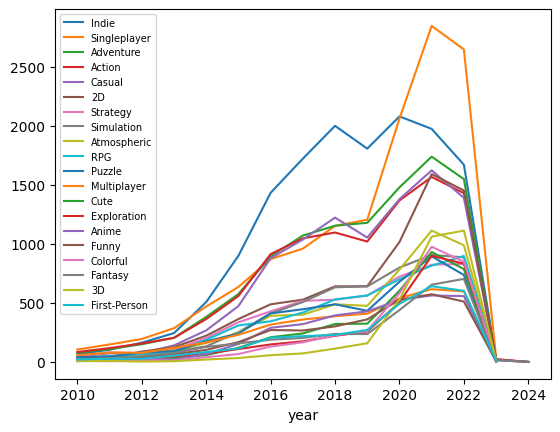

In [57]:
for tag in top_tags:
    # V grafu je lahko največ 10 barv, zato bomo narisali dva grafa
    plot_tag_over_time(tag)
mpl.pyplot.legend(top_tags, prop={'size' : 7}, loc='upper left')